<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

데이터 불러오기

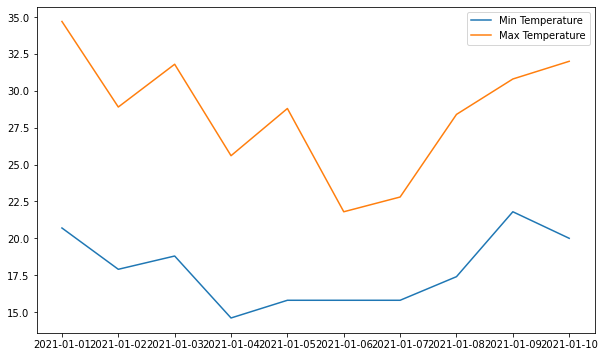

In [1]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]

min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,6))
axes.plot(dates, min_temperature, label = 'Min Temperature')
axes.plot(dates, max_temperature, label = 'Max Temperature')
axes.legend()
plt.show()

In [3]:
print(fig)
print(axes)

Figure(720x432)
AxesSubplot(0.125,0.125;0.775x0.755)


# 선 그래프

# pyplot API

In [4]:
import fix_yahoo_finance as yf
data = yf.download('AAPL', '2019-08-01', '2020-08-01')
data.info()

[*********************100%***********************]  1 of 1 downloaded
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-08-01 to 2020-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [5]:
ts = data['Open']
print(ts.head())

Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


[*********************100%***********************]  1 of 1 downloaded


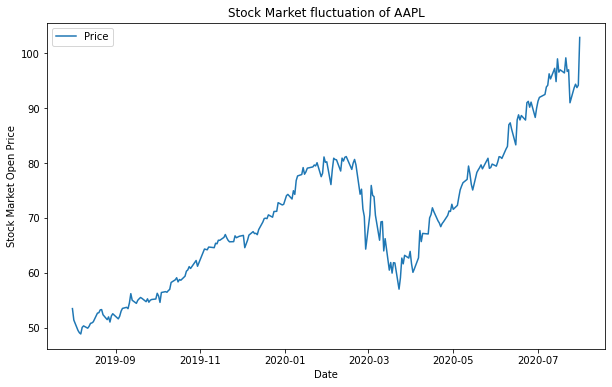

In [13]:
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']
plt.figure(figsize=(10,6))
plt.plot(ts)
plt.legend(labels=['Price'], loc='best')
plt.title('Stock Market fluctuation of AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Market Open Price')
plt.show()

# 객체지향 API

In [20]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()

import numpy as np
np.random.seed(6)
x = np.random.randn(20000)

ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title('Artist Layer Histogram')
fig.savefig('Matplotlib_histogram.png')

[*********************100%***********************]  1 of 1 downloaded


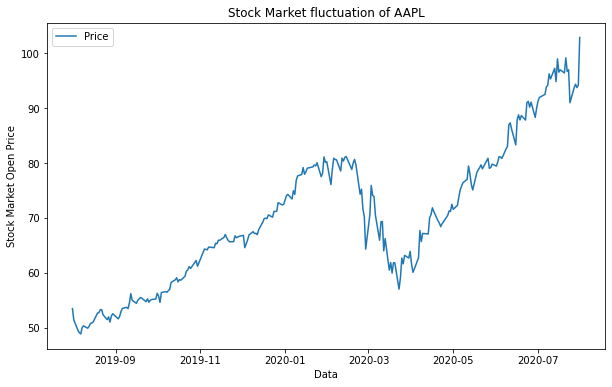

In [27]:
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01', '2020-08-01')
ts = data['Open']

fig = plt.figure(figsize=(10,6)) # 직접 Figure 객체 생성
ax = fig.subplots() # 직접 axes를 생성
ax.plot(ts) # 생성된 axes에 대한 plot() 멤버 직접 호출
ax.set_title('Stock Market fluctuation of AAPL')
ax.legend(labels=['Price'], loc='best')
ax.set_xlabel('Data')
ax.set_ylabel('Stock Market Open Price')
plt.show()

# 막대그래프

Rectangle(xy=(0.6, 0), width=0.8, height=300, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=400, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=550, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=900, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=600, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=960, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=900, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=910, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=800, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=700, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=550, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=450, angle=0)


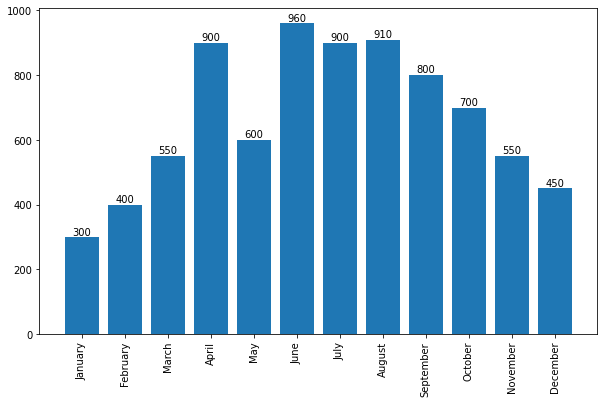

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1,2,3,4,5,6,7,8,9,10,11,12]
sold_list = [300,400,550,900,600,960,900,910,800,700,550,450]

fig, ax = plt.subplots(figsize=(10,6))
plot = ax.bar(month_list, sold_list)

ax.set_xticks(month_list)
ax.set_xticklabels(calendar.month_name[1:13], rotation=90)

for rect in plot:
    print(rect)
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height, '%d'%
            int(height), ha='center', va='bottom')
plt.show()

# 산점도 그래프

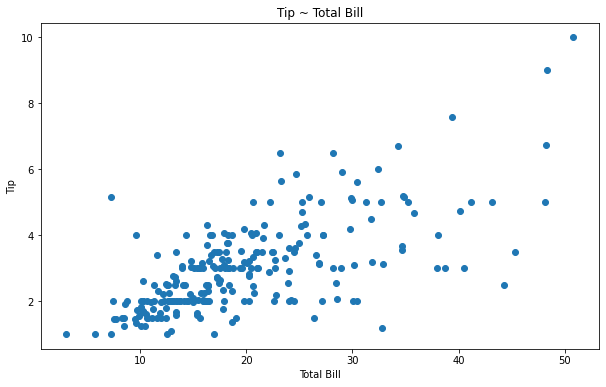

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip ~ Total Bill')

fig.show()

In [48]:
label, data = tips.groupby('sex')

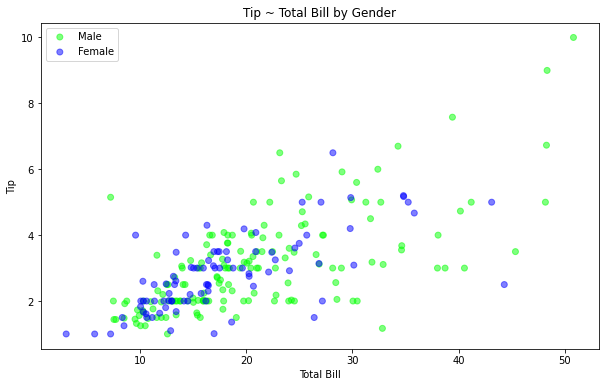

In [56]:
tips['sex_color'] = tips['sex'].map({"Female" : "#0000FF", "Male" : "#00FF00"})

fig, ax = plt.subplots(figsize=(10,6))

for label, data in tips.groupby('sex'):
    ax.scatter(data['total_bill'], data['tip'], label=label,
               color=data['sex_color'], alpha=0.5)
    ax.set_xlabel('Total Bill')
    ax.set_ylabel('Tip')
    ax.set_title('Tip ~ Total Bill by Gender')

ax.legend()
fig.show()

# 히스토그램

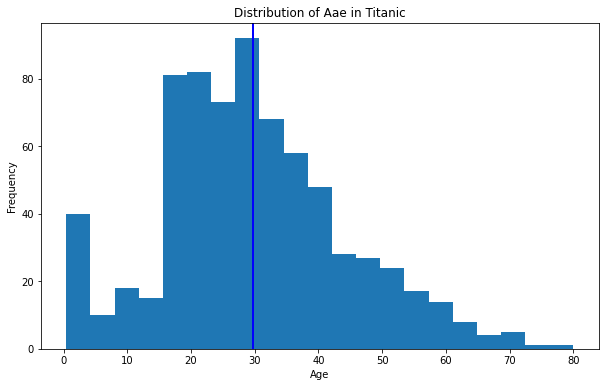

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')
age = titanic['age']

nbins = 21
fig, ax = plt.subplots(figsize=(10, 6))

#histogram
ax.hist(age, bins= nbins)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Aae in Titanic")

#vline
ax.axvline(x = age.mean(), linewidth = 2, color = 'b')
fig.show()

# 박스플롯

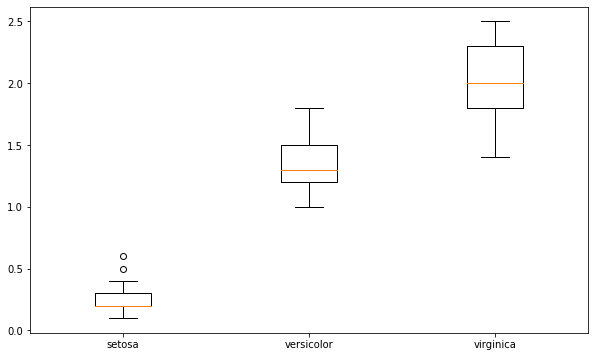

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=='setosa']['petal_width'],
        iris[iris['species']=='versicolor']['petal_width'],
        iris[iris['species']=='virginica']['petal_width'],]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show()

# 히트맵

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

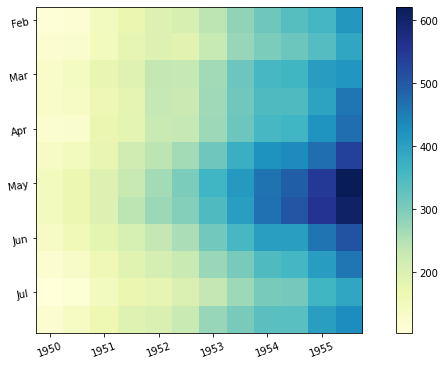

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset('flights')
flights = flights.pivot("month","year","passengers")
print(flights)

fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(flights, cmap = 'YlGnBu')
ax.set_xticklabels(flights.columns, rotation = 20)
ax.set_yticklabels(flights.index, rotation = 10)
fig.colorbar(im)

fig.show()